In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### Data load

In [2]:
df = pd.read_csv("Ankieta.csv")
df.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


In [3]:
X = np.array([df['Waga'].values, df['Wzrost'].values]).T
X_scaled = MinMaxScaler().fit_transform(X.reshape(-1, 1)).reshape(-1, 2)

mapping = {'Kobieta':0, 'Mezczyzna':1}
y = np.vectorize(mapping.get)(df['Plec'])

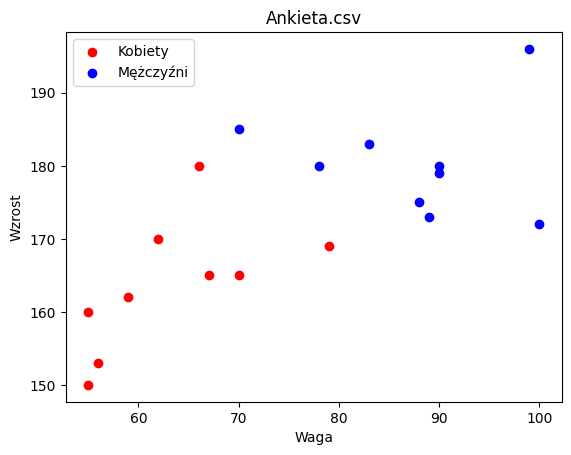

In [4]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c = 'red', label='Kobiety')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c = 'blue', label='Mężczyźni')

plt.title("Ankieta.csv")
plt.xlabel("Waga")
plt.ylabel("Wzrost")
plt.legend()
plt.show()

#### Algorithm

In [5]:
class Perceptron:
    def __init__(self, X, y):
        self._X = np.column_stack((np.ones((X.shape[0], 1)), X))
        self._y = y
        self._weights = np.random.uniform(-1, 1, size=self._X.shape[1])
        self._weights_history = [self._weights.copy()]
        
    def heaviside_function(self, x):
        return 1 if x >= 0 else 0
    
    def train(self, max_epochs=10000, alpha=0.1, verbose=True):
        epoch = 1
        while epoch <= max_epochs:
            misclassified = 0
            for sample, label in zip(self._X, self._y):
                weighted_sum = np.dot(sample, self._weights)
                prediction = self.heaviside_function(weighted_sum)
                
                if label != prediction:
                    misclassified += 1
                    self._weights += alpha * (label - prediction) * sample
                    self._weights_history.append(self._weights.copy())
                    
            if misclassified == 0:
                if verbose: print(f'Perceptron converged in #{epoch} epoch. Stop training.')
                break
                
            epoch += 1
    
    def predict(self, X):
        X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
        return np.array([self.heaviside_function(x) for x in np.dot(X_with_bias, self._weights)])
    
    def get_weights_history(self):
        return np.array(self._weights_history)

In [6]:
perceptron = Perceptron(X_scaled, y)
perceptron.train()

print(f'Poprawnie sklasyfikowanych: {np.count_nonzero(perceptron.predict(X_scaled) == y)} / {len(y)}')

Perceptron converged in #18 epoch. Stop training.
Poprawnie sklasyfikowanych: 18 / 18


#### Data normalization

In [7]:
print('Przed normalizacją:')
%timeit perceptron = Perceptron(X, y); perceptron.train(verbose=False)

X_scaled = MinMaxScaler().fit_transform(X.reshape(-1, 1)).reshape(-1, 2)

print('Po normalizacji:')
%timeit perceptron = Perceptron(X_scaled, y); perceptron.train(verbose=False)

Przed normalizacją:
256 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Po normalizacji:
2.6 ms ± 175 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Decision boundary

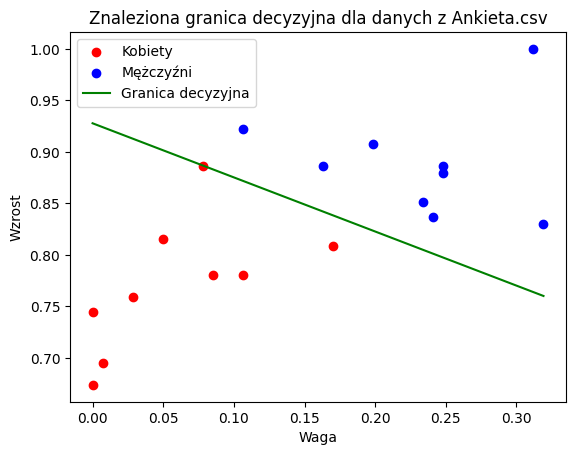

In [8]:
weights = perceptron.get_weights_history()[-1]

x1 = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 10)
x2 = -(weights[1] * x1 + weights[0]) / weights[2]

plt.scatter(X_scaled[:, 0][y == 0], X_scaled[:, 1][y == 0], c = 'red', label='Kobiety')
plt.scatter(X_scaled[:, 0][y == 1], X_scaled[:, 1][y == 1], c = 'blue', label='Mężczyźni')
plt.plot(x1, x2, color='green', label='Granica decyzyjna')

plt.title("Znaleziona granica decyzyjna dla danych z Ankieta.csv")
plt.xlabel("Waga")
plt.ylabel("Wzrost")
plt.legend()
plt.show()

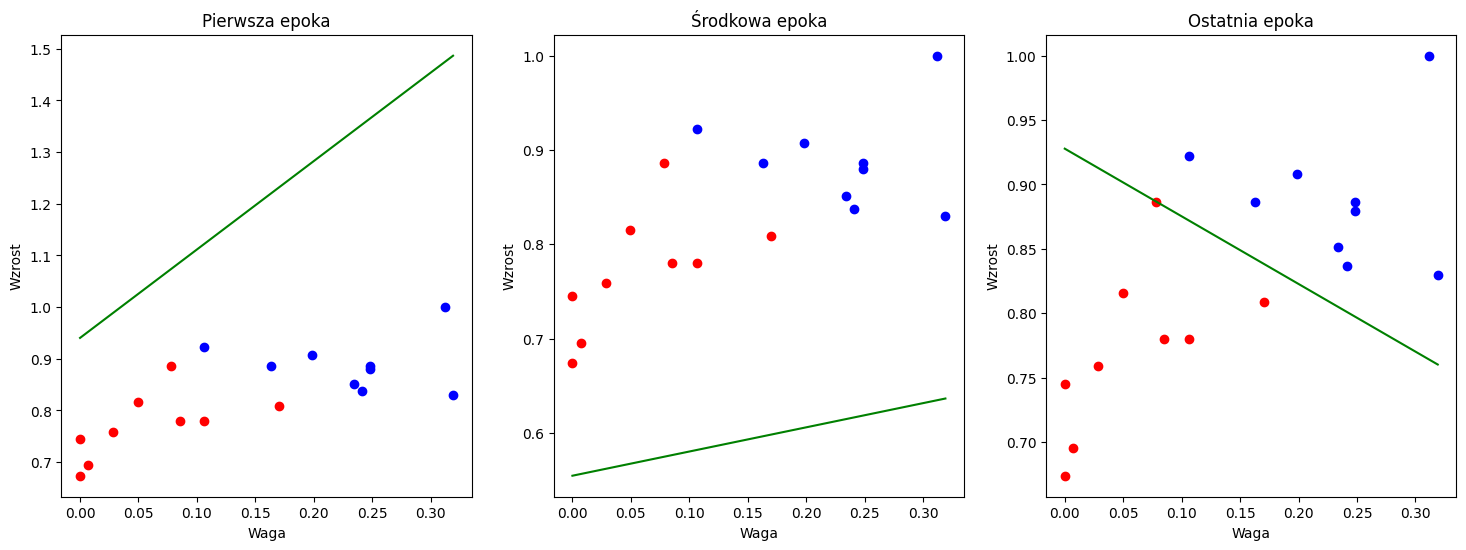

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

weights_history = perceptron.get_weights_history()
weights_first = weights_history[0]
weights_middle = weights_history[len(weights_history) // 2]
weights_last = weights_history[-1]

x = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 10)
y_first = -(weights_first[1] * x + weights_first[0]) / weights_first[2]
y_middle = -(weights_middle[1] * x + weights_middle[0]) / weights_middle[2]
y_last = -(weights_last[1] * x + weights_last[0]) / weights_last[2]

axs[0].scatter(X_scaled[:, 0][y == 0], X_scaled[:, 1][y == 0], c = 'red', label='Kobiety')
axs[0].scatter(X_scaled[:, 0][y == 1], X_scaled[:, 1][y == 1], c = 'blue', label='Mężczyźni')
axs[0].plot(x, y_first, color='green', label='Granica decyzyjna')
axs[0].set_xlabel('Waga')
axs[0].set_ylabel('Wzrost')
axs[0].set_title('Pierwsza epoka')

axs[1].scatter(X_scaled[:, 0][y == 0], X_scaled[:, 1][y == 0], c = 'red', label='Kobiety')
axs[1].scatter(X_scaled[:, 0][y == 1], X_scaled[:, 1][y == 1], c = 'blue', label='Mężczyźni')
axs[1].plot(x, y_middle, color='green', label='Granica decyzyjna')
axs[1].set_xlabel('Waga')
axs[1].set_ylabel('Wzrost')
axs[1].set_title('Środkowa epoka')

axs[2].scatter(X_scaled[:, 0][y == 0], X_scaled[:, 1][y == 0], c = 'red', label='Kobiety')
axs[2].scatter(X_scaled[:, 0][y == 1], X_scaled[:, 1][y == 1], c = 'blue', label='Mężczyźni')
axs[2].plot(x, y_last, color='green', label='Granica decyzyjna')
axs[2].set_xlabel('Waga')
axs[2].set_ylabel('Wzrost')
axs[2].set_title('Ostatnia epoka')

plt.show()

#### Accuracy

In [10]:
correct_predictions = np.count_nonzero(perceptron.predict(X_scaled) == y)

print(f'Poprawnie sklasyfikowanych: {correct_predictions}/{len(y)} = {round(correct_predictions/len(y)*100, 2)}%')

Poprawnie sklasyfikowanych: 18/18 = 100.0%


#### 3D example

In [11]:
df = pd.read_csv("3D_perceptron.csv")
df.head()

X = np.array([df['x1'].values, df['x2'].values, df['x3'].values]).T
y = df['y'].values

X_scaled = MinMaxScaler().fit_transform(X.reshape(-1, 1)).reshape(-1, 3)

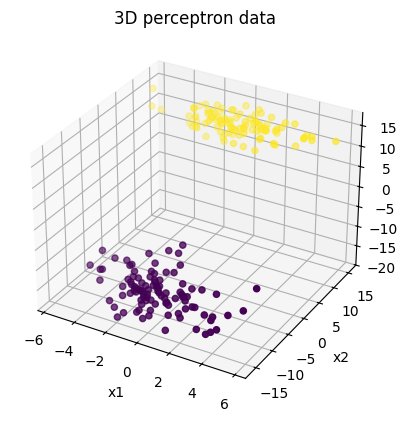

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D perceptron data')

plt.show()

In [13]:
perceptron = Perceptron(X_scaled, y)
perceptron.train(verbose=True)
print(f'Poprawnie sklasyfikowanych: {np.count_nonzero(perceptron.predict(X_scaled) == y)} / {len(y)}')

Perceptron converged in #2 epoch. Stop training.
Poprawnie sklasyfikowanych: 200 / 200


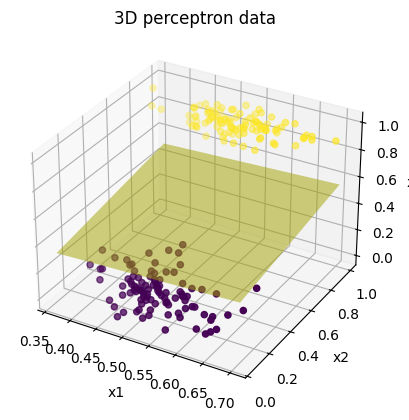

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

weights = perceptron.get_weights_history()[-1]

x1, x2 = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 10),
                    np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 10))
x3 = -(weights[0] + weights[1] * x1 + weights[2] * x2) / weights[3]

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y)
ax.plot_surface(x1, x2, x3, alpha=0.5, rstride=100, cstride=100, color='y')
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D perceptron data')

plt.show()

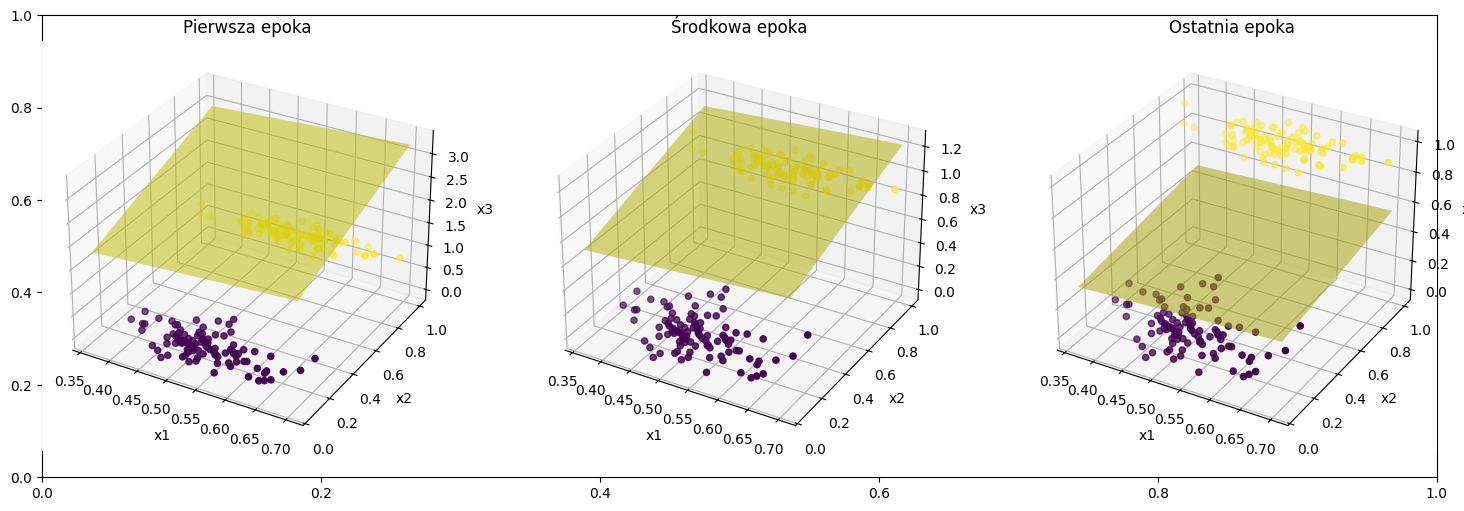

In [15]:
fig, _ = plt.subplots(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

weights_history = perceptron.get_weights_history()
weights_first = weights_history[0]
weights_middle = weights_history[len(weights_history) // 2]
weights_last = weights_history[-1]

x1, x2 = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 10),
                    np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 10))

x3 = -(weights_first[0] + weights_first[1] * x1 + weights_first[2] * x2) / weights_first[3]
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y)
ax1.plot_surface(x1, x2, x3, alpha=0.5, rstride=100, cstride=100, color='y')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('x3')
ax1.set_title('Pierwsza epoka')

x3 = -(weights_middle[0] + weights_middle[1] * x1 + weights_middle[2] * x2) / weights_middle[3]
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y)
ax2.plot_surface(x1, x2, x3, alpha=0.5, rstride=100, cstride=100, color='y')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('x3')
ax2.set_title('Środkowa epoka')

x3 = -(weights_last[0] + weights_last[1] * x1 + weights_last[2] * x2) / weights_last[3]
ax3.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y)
ax3.plot_surface(x1, x2, x3, alpha=0.5, rstride=100, cstride=100, color='y')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('x3')
ax3.set_title('Ostatnia epoka')

plt.show()

#### Unit test

In [16]:
# Test sprawdzający, czy zaimplementowany perceptron jest w stanie nauczyć się bramki logicznej AND.

import unittest

class TestPerceptronWithAND(unittest.TestCase):
    
    def setUp(self):
        self.X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        self.y = np.array([0, 0, 0, 1])
        self.perceptron = Perceptron(self.X, self.y)
        self.perceptron.train(max_epochs=1000, alpha=0.1)
        
    def test_predict(self):
        preds = self.perceptron.predict(self.X)
        np.testing.assert_array_equal(self.y, preds)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_predict (__main__.TestPerceptronWithAND.test_predict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


Perceptron converged in #11 epoch. Stop training.
